In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_camph_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Camphene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.222222
3,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Camphene'], axis = 1)
y = df_rf[['X..Camphene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.22222222],
       [0.22222222],
       [0.22222222],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<Axes: ylabel='Count'>

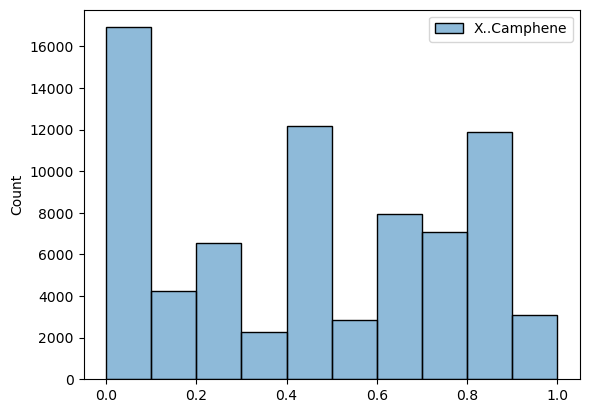

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_2028/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05807955719357084

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.012321647696574446

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1110029175137953

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9771812325643091

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.8888235753891993

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.091884
1,lsa_1,0.087678
2,lsa_2,0.088149
3,lsa_3,0.090165
4,lsa_4,0.092087
...,...,...
81,tree,0.002266
82,tropical,0.002787
83,vanilla,0.003067
84,violet,0.000265


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
50,diesel,1.554851e-01
4,lsa_4,9.208749e-02
0,lsa_0,9.188412e-02
3,lsa_3,9.016546e-02
2,lsa_2,8.814890e-02
1,lsa_1,8.767813e-02
60,mango,5.081205e-02
5,hybrid,3.315239e-02
7,sativa,2.951483e-02
6,indica,2.131231e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([9.12840433e-02, 8.77255177e-02, 8.83429695e-02, 8.92254554e-02,
       9.25428599e-02, 3.18359516e-02, 2.16218997e-02, 3.06559785e-02,
       1.23802996e-04, 4.99726094e-03, 4.38540310e-03, 2.36145602e-06,
       5.85808533e-03, 9.27584737e-05, 3.98413591e-03, 4.99548089e-03,
       7.17302672e-03, 6.25468389e-03, 2.32121477e-07, 8.40802936e-03,
       1.02093510e-06, 1.36212425e-06, 6.77566471e-03, 5.66469513e-03,
       8.20592658e-03, 1.88344148e-03, 6.79288811e-03, 1.30570967e-04,
       1.46180905e-06, 3.11403881e-03, 8.23733450e-03, 1.42412607e-06,
       6.20556730e-03, 0.00000000e+00, 0.00000000e+00, 5.29999681e-03,
       5.74128558e-03, 7.76469765e-03, 1.92666132e-03, 1.06798573e-04,
       1.56742487e-04, 5.56475289e-03, 3.41843594e-04, 1.17164636e-02,
       1.33040452e-03, 4.72080133e-03, 1.75113096e-03, 2.90667397e-04,
       1.35184405e-02, 1.00911053e-03, 1.56529635e-01, 9.89937092e-03,
       3.03426352e-03, 2.00988596e-03, 6.00096582e-03, 1.03200341e-03,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,blueberry,citrus,diesel,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,0,0
3,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0
74998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_camph.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_camph.pkl")

['selected_X_rf_lsa_elbow_camph.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_2028/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06178998441546353

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.013364910098885758

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11560670438554053

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9624102934723241

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.8799372110809163

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_camph.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_camph.pkl")

['rscv_rf_lsa_elbow_best_params_camph.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 2, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_2028/430785170.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.0832779118597741

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.01624675505335667

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1274627594764709

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9338993052029764

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.8540483468905755

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_camph.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_camph.pkl")

['y_test_rfreg_lsa_elbow_camph.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.08129992650797692

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.015670656056287577

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.1251824910132706

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.8609532660595298

Error analysis

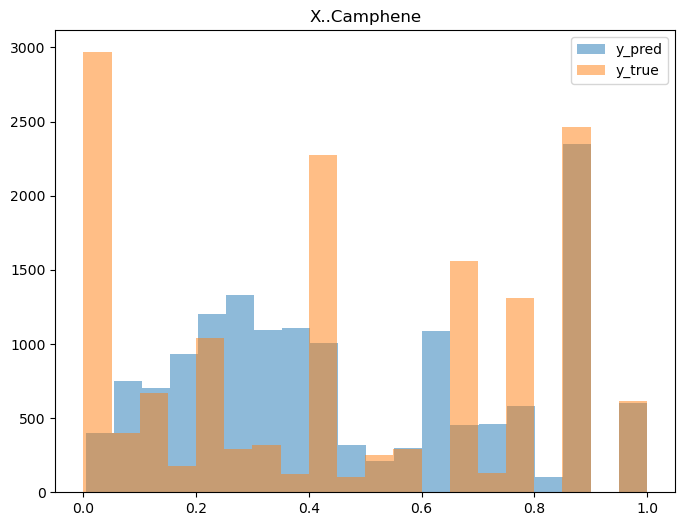

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Camphene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_camph.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.933
P-value: 0.000


<Axes: >

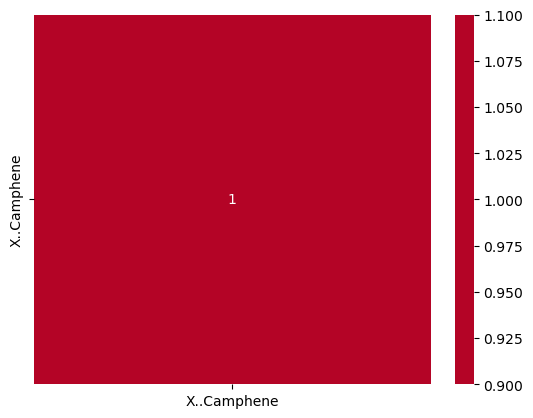

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)